# **Loading Required Libraries**

In [ ]:
import numpy as np
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds


# **Task 1:** Read / Resize/ Store  image Dataset

* Using Keras Utils
* Using Tf.data

In [ ]:
### Using Keras Utils

batch_size = 32
img_height = 28
img_width = 28
AUTOTUNE = tf.data.AUTOTUNE

## Data Directory Path
(train_ds, val_ds), ds_info = tfds.load('mnist',split=['train', 'test'],shuffle_files=True,as_supervised=True,with_info=True)

print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [ ]:
vals = np.unique(np.fromiter(train_ds.map(lambda x, y: y), float), return_counts=True)

for val, count in zip(*vals):
    print(int(val), count)

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [ ]:
print("Total No of Classes:",ds_info.features["label"].num_classes)
print("All Class Names:",ds_info.features["label"].names)

# print(ds_info.features)
# print(ds_info.features["label"].int2str()) 
# print(ds_info.features["label"].str2int('7'))

Total No of Classes: 10
All Class Names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
tfds.as_dataframe(train_ds.take(4), ds_info)

,image,label
0,,4
1,,1
2,,0
3,,7


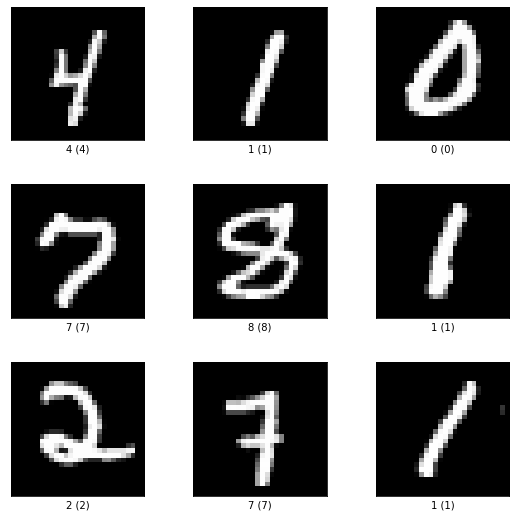

In [ ]:
fig = tfds.show_examples(train_ds, ds_info)

# **Task 2:** Checking Image Generators and Shape of Data Loaded



In [ ]:
# for image, label in tfds.as_numpy(train_ds.take(5)):
#   print(type(image), type(label), label)

for image, label in train_ds.take(5):
  print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(8, shape=(), dtype=int64)


In [ ]:
# Checking Labels and Image Data with generators 

image_batch, labels_batch=next(iter(train_ds)) 
print(labels_batch)

## Checking Image Array shape and Labels Shape.

for image_batch, labels_batch in train_ds:  
  print("Images Data Shape:",image_batch.shape)
  # print("Image Labels Shape:",labels_batch.shape)
  break


tf.Tensor(4, shape=(), dtype=int64)
Images Data Shape: (28, 28, 1)


# **Task 3:** Data Augmentation and Normalization


In [ ]:
# Batching the Training and Test Data

train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [ ]:
resize_and_rescale = tf.keras.Sequential([tf.keras.layers.Resizing(img_height, img_width),tf.keras.layers.Rescaling(1./255)])
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal"), tf.keras.layers.RandomRotation(0.1)])

train_ds = train_ds.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)

image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]

print("Length of Batch Train Data After Augumenting:",len(train_ds))
print("Minimum pixel Value:",np.min(first_image),"Maximum Pixel Value:", np.max(first_image))

Length of Batch Train Data After Augumenting: 1875
Minimum pixel Value: 0.0 Maximum Pixel Value: 1.0


## **Task 4:** Configuring Dataset For Performance (ETL Pipelines)

In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE) ##  Cache and Prefetching
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) ## Using Cache and PreFetching

# **Task 5:** Modelling

In [ ]:
# tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.001,patience=5,mode='auto',verbose=2,baseline=0.98)

In [ ]:
num_classes = 10

model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes)
          ])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history=model.fit(train_ds,epochs=6,validation_data=val_ds)

Epoch 1/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2594 - sparse_categorical_accuracy: 0.9179 - val_loss: 0.0916 - val_sparse_categorical_accuracy: 0.9732
Epoch 2/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0917 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.0765 - val_sparse_categorical_accuracy: 0.9778
Epoch 3/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0682 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.0690 - val_sparse_categorical_accuracy: 0.9789
Epoch 4/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0540 - sparse_categorical_accuracy: 0.9836 - val_loss: 0.0574 - val_sparse_categorical_accuracy: 0.9829
Epoch 5/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0567 - val_sparse_categorical_accuracy: 0.9825
Epoch 6/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0378 - spars

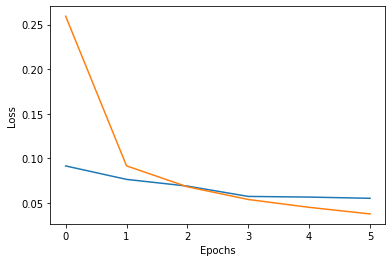

In [ ]:
## Visualizing Loss Graph
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

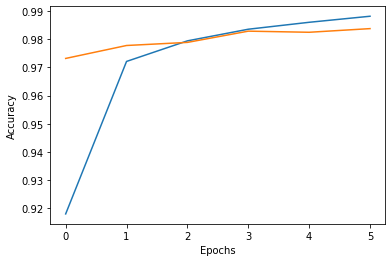

In [ ]:
## Visualizing Accuracy Graph
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Model Converging at 3 epochs, Hence 3 epochs is fine for training the model.

# Checking Model Stability and Variation

In [ ]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [ ]:
img_num_channels=1
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
x_train = x_train / 255
x_test = x_test / 255

inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 10, random_state = 7, shuffle = True) 


In [ ]:
acc_per_fold=[]
loss_per_fold=[]

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in skf.split(inputs, targets):

  model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes)
          ])

  # Compile the model
  model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  history=model.fit(inputs[train], targets[train],epochs=6)

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

Epoch 1/6
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2693 - sparse_categorical_accuracy: 0.9166 - val_loss: 0.0992 - val_sparse_categorical_accuracy: 0.9699
Epoch 2/6
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0955 - sparse_categorical_accuracy: 0.9705 - val_loss: 0.0716 - val_sparse_categorical_accuracy: 0.9787
Epoch 3/6
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0708 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.0635 - val_sparse_categorical_accuracy: 0.9799
Epoch 4/6
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0557 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0630 - val_sparse_categorical_accuracy: 0.9809
Epoch 5/6
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0460 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0601 - val_sparse_categorical_accuracy: 0.9826
Epoch 6/6
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0384 -

In [119]:
print("Mean accuracy:",np.mean(acc_per_fold))
print("Standard Deviation of model:",np.std(acc_per_fold))

Mean accuracy: 98.26142907142639
Standard Deviation of model: 0.2989130106573498


In [120]:
print("Mean Loss:",np.mean(loss_per_fold))
print("Standard Deviation(Loss) of model:",np.std(loss_per_fold))

Mean Loss: 0.056753528863191606
Standard Deviation(Loss) of model: 0.009988467961323499
